In [5]:
%matplotlib inline
from __future__ import print_function

try:
    range
except NameError:
    xrange = range

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
# Đọc dữ liệu từ tệp CSV

data = pd.read_csv('kc_house_data.csv')
from sklearn.preprocessing import MaxAbsScaler

# Chọn các cột cần phân tích
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
dataset_for_cl = data[cols]

# Chuẩn hóa dữ liệu
scaler = MaxAbsScaler()
dataset_for_cl_scaled = scaler.fit_transform(dataset_for_cl)

print(dataset_for_cl_scaled[:5])  # Xem dữ liệu đã chuẩn hóa


[[0.02881818 0.09090909 0.125      0.08714919 0.00342142]
 [0.06987013 0.09090909 0.28125    0.18980798 0.00438548]
 [0.02337662 0.06060606 0.125      0.05686854 0.00605562]
 [0.07844156 0.12121212 0.375      0.14475628 0.00302781]
 [0.06623377 0.09090909 0.25       0.12407681 0.00489294]]


In [6]:
def generate_2dim_normal(mean, variance, covariance, sample_size):
    cov = [[variance, covariance],
           [covariance, variance]]
    return np.random.multivariate_normal(mean, cov, sample_size)

In [7]:
cluster1 = generate_2dim_normal(mean=[0, 8], variance=1,
                                covariance=0, sample_size=500)
cluster2 = generate_2dim_normal(mean=[-1, 0], variance=1,
                                covariance=0, sample_size=500)
cluster3 = generate_2dim_normal(mean=[10, 10], variance=1,
                                covariance=0, sample_size=300)
cluster4 = generate_2dim_normal(mean=[5, 5.5], variance=0.8,
                                covariance=-0.1, sample_size=200)
data = np.vstack((cluster1, cluster2, cluster3, cluster4))

Text(0, 0.5, 'x2')

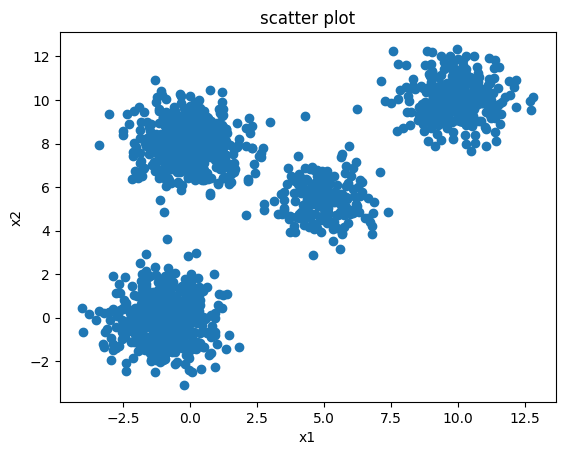

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:, 0], data[:, 1])
ax.set_title('scatter plot')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [9]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300)

In [10]:
km.fit(data)

KMeans(n_clusters=4, n_init=10)

In [11]:
cluster_labels = km.predict(data)

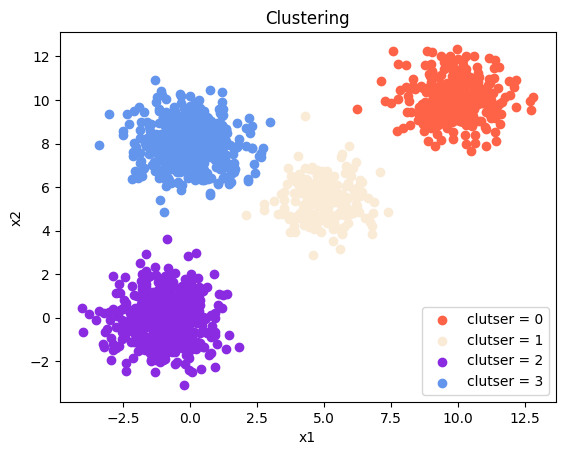

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colorlist = ['tomato', 'antiquewhite', 'blueviolet', 'cornflowerblue',
             'darkgreen', 'seashell', 'skyblue', 'mediumseagreen']

cluster_ids = list(set(cluster_labels))

for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'clutser = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:, 0], data_by_cluster[:, 1],
               c=colorlist[k], label=label_)

ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

In [13]:
max_cluster = 10
clusters_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in clusters_:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(data)
    intra_sum_of_square_list.append(km.inertia_)

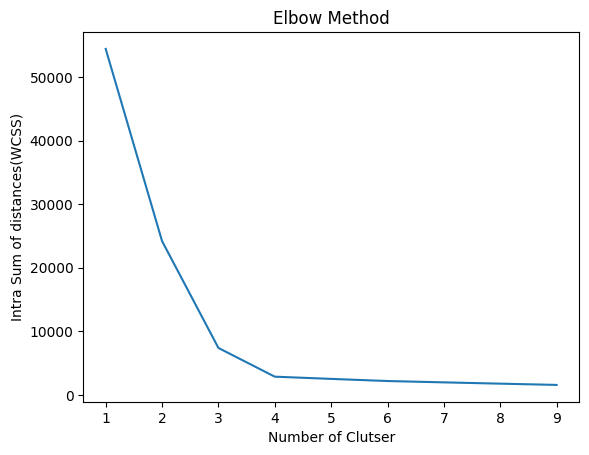

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clutser')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(clusters_, intra_sum_of_square_list)

In [15]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(data)
cluster_labels = km.predict(data)

In [16]:
silhouette_avg = silhouette_score(data, cluster_labels)

In [17]:
each_silhouette_score = silhouette_samples(data, cluster_labels,
                                           metric='euclidean')

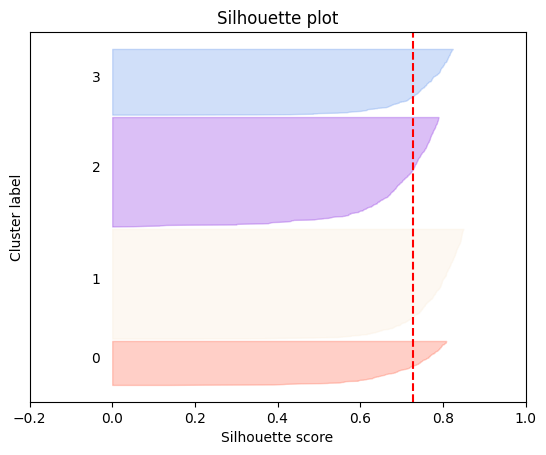

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
y_lower = 10
for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
         each_silhouette_score[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colorlist[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                         ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.3)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title('Silhouette plot')
ax.set_xlabel('Silhouette score')
ax.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', linestyle='--')

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

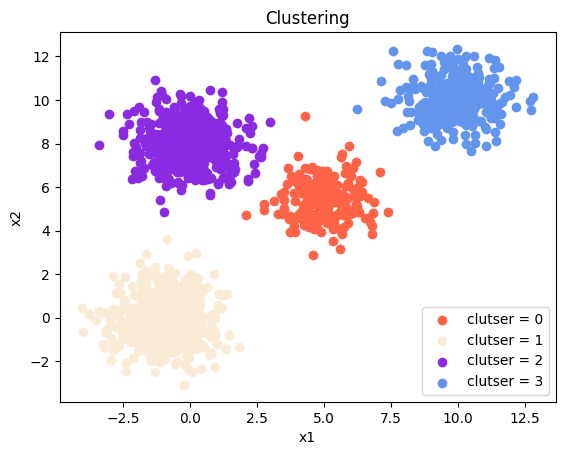

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cluster_ids = list(set(cluster_labels))

for k in range(len(cluster_ids)):
    cluster_id = cluster_ids[k]
    label_ = 'clutser = %d' % cluster_id
    data_by_cluster = data[cluster_labels == cluster_id]
    ax.scatter(data_by_cluster[:, 0], data_by_cluster[:, 1],
               c=colorlist[k], label=label_)

ax.set_title('Clustering')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend(loc='lower right')

In [21]:
data = pd.read_csv('kc_house_data.csv')


In [23]:
print(data.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [27]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']


In [28]:
dataset_for_cl = data[cols]
print(dataset_for_cl.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot
0  221900.0         3       1.00         1180      5650
1  538000.0         3       2.25         2570      7242
2  180000.0         2       1.00          770     10000
3  604000.0         4       3.00         1960      5000
4  510000.0         3       2.00         1680      8080


In [29]:
# scaler = StandardScaler()
scaler = MaxAbsScaler()
dataset_for_cl_scaled = scaler.fit_transform(dataset_for_cl)

In [30]:
max_cluster = 10
clusters_ = range(1, max_cluster)
intra_sum_of_square_list = []
for k in clusters_:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    km.fit(dataset_for_cl)
    intra_sum_of_square_list.append(km.inertia_)

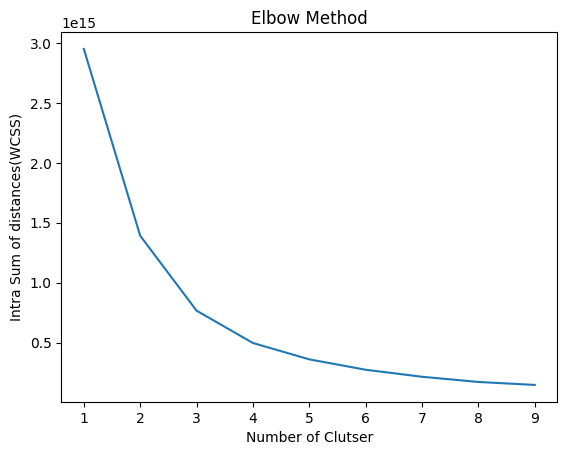

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Elbow Method')
ax.set_xlabel('Number of Clutser')
ax.set_ylabel('Intra Sum of distances(WCSS)')
plt.plot(clusters_, intra_sum_of_square_list)

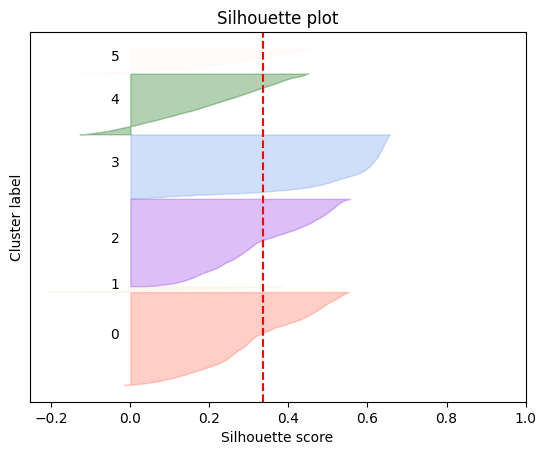

In [32]:
n_clusters = 6
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
km.fit(dataset_for_cl_scaled)
cluster_labels = km.predict(dataset_for_cl_scaled)

silhouette_avg = silhouette_score(dataset_for_cl_scaled, cluster_labels)

each_silhouette_score = silhouette_samples(dataset_for_cl_scaled,
                                           cluster_labels, metric='euclidean')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

y_lower = 10

for i in range(n_clusters):
        ith_cluster_silhouette_values = \
         each_silhouette_score[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = colorlist[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                         ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.3)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title('Silhouette plot')
ax.set_xlabel('Silhouette score')
ax.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', linestyle='--')

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

,price,bedrooms,bathrooms,sqft_living,sqft_lot
0,0.056707,0.097727,0.221276,0.126497,0.008057
1,0.282288,0.138057,0.515538,0.388274,0.024844
2,0.056579,0.102024,0.313033,0.143180,0.006092
3,0.044655,0.078385,0.127257,0.086031,0.006806
4,0.096623,0.119612,0.313712,0.216649,0.013444
5,0.122314,0.130100,0.433767,0.260920,0.016083


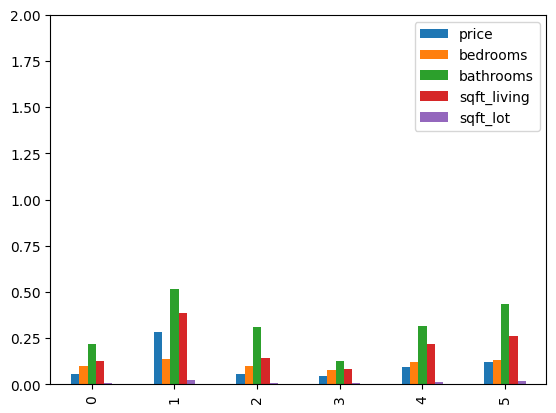

In [33]:
km_centers = pd.DataFrame(km.cluster_centers_, columns=cols)
km_centers.plot.bar(ylim=[0, 2], fontsize=10)
km_centers

In [4]:
print(data.columns)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [34]:
print(data.shape)  # In ra số dòng và số cột


(21613, 21)


In [35]:
print(data.isnull().sum())  # Kiểm tra số lượng giá trị thiếu ở mỗi cột


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


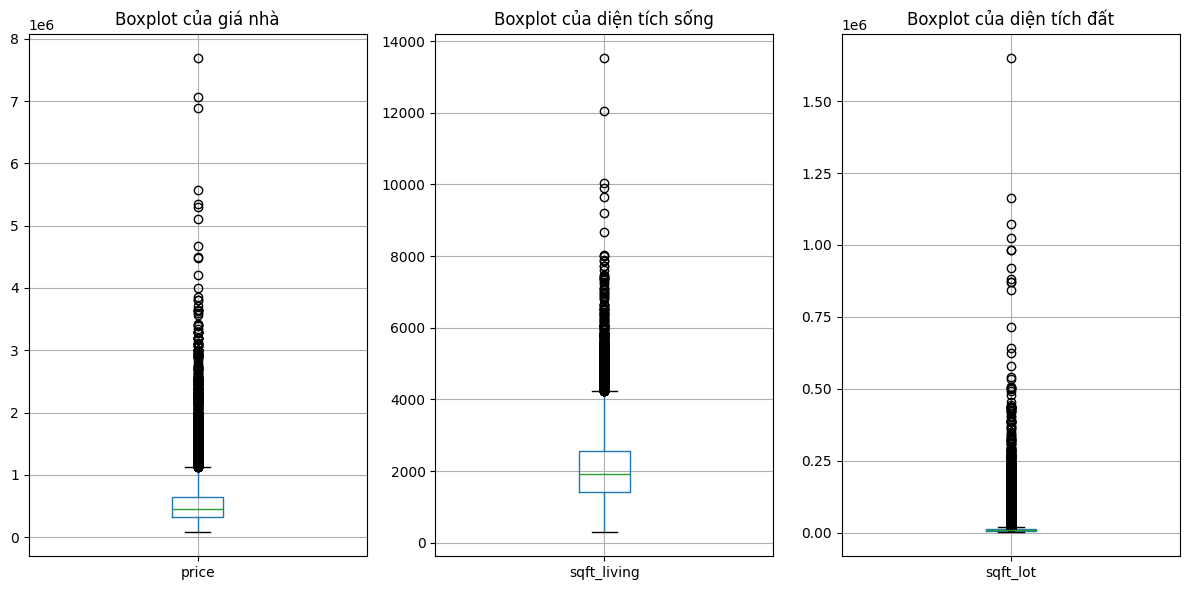

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
data = pd.read_csv('kc_house_data.csv')

# Vẽ boxplot cho các cột quan trọng
plt.figure(figsize=(12, 6))

# Boxplot cho cột 'price'
plt.subplot(1, 3, 1)
data.boxplot(column='price')
plt.title('Boxplot của giá nhà')

# Boxplot cho cột 'sqft_living'
plt.subplot(1, 3, 2)
data.boxplot(column='sqft_living')
plt.title('Boxplot của diện tích sống')

# Boxplot cho cột 'sqft_lot'
plt.subplot(1, 3, 3)
data.boxplot(column='sqft_lot')
plt.title('Boxplot của diện tích đất')

plt.tight_layout()
plt.show()


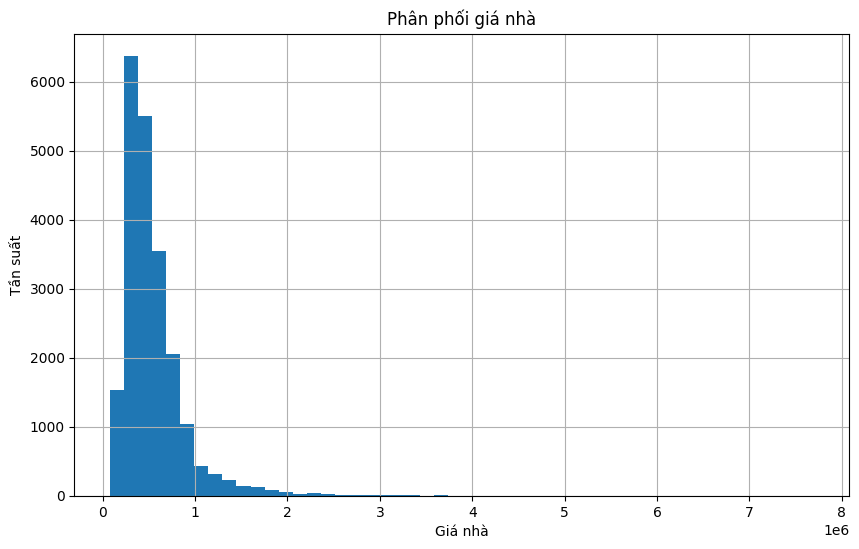

In [38]:
# Vẽ histogram cho cột 'price'
data['price'].hist(bins=50, figsize=(10,6))
plt.title('Phân phối giá nhà')
plt.xlabel('Giá nhà')
plt.ylabel('Tần suất')
plt.show()


In [39]:
# Tính toán IQR cho các cột quan trọng
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc các giá trị ngoại lệ
outliers_price = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# In số lượng ngoại lệ và một số giá trị ngoại lệ
print(f"Số lượng ngoại lệ trong cột 'price': {len(outliers_price)}")
print(outliers_price.head())


Số lượng ngoại lệ trong cột 'price': 1146
             id             date      price  bedrooms  bathrooms  sqft_living  \
5    7237550310  20140512T000000  1225000.0         4       4.50         5420   
21   2524049179  20140826T000000  2000000.0         3       2.75         3050   
49    822039084  20150311T000000  1350000.0         3       2.50         2753   
69   1802000060  20140612T000000  1325000.0         5       2.25         3200   
125  4389200955  20150302T000000  1450000.0         4       2.75         2750   

     sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
5      101930     1.0           0     0  ...     11        3890   
21      44867     1.0           0     4  ...      9        2330   
49      65005     1.0           1     2  ...      9        2165   
69      20158     1.0           0     0  ...      8        1600   
125     17789     1.5           0     0  ...      8        1980   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     lon

In [40]:
# Loại bỏ ngoại lệ trong cột 'price'
data_cleaned = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

# Kiểm tra kích thước dữ liệu sau khi loại bỏ ngoại lệ
print(f"Size of dataset after removing outliers: {data_cleaned.shape}")


Size of dataset after removing outliers: (20467, 21)


In [43]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade']


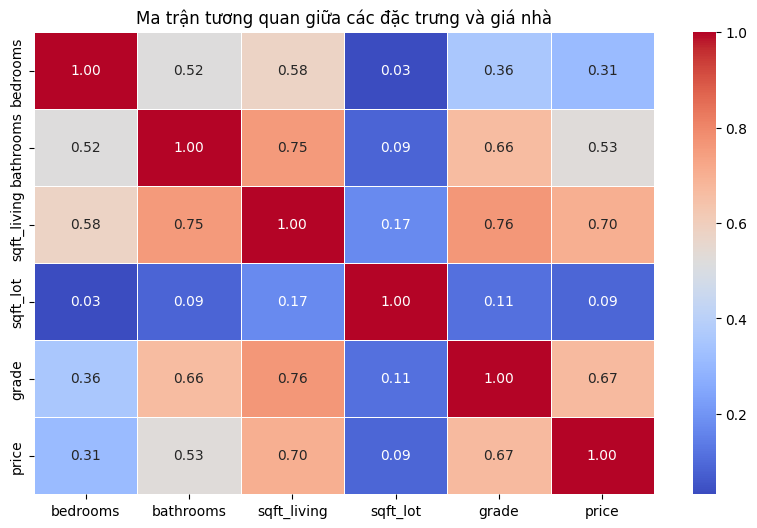

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan giữa các đặc trưng và giá
corr_matrix = data[features + ['price']].corr()

# Vẽ heatmap để hiển thị ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan giữa các đặc trưng và giá nhà')
plt.show()


In [2]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu từ file CSV
data = pd.read_csv('kc_house_data.csv')  # Đảm bảo file này có trong thư mục làm việc

# Kiểm tra dữ liệu
print(data.info())  # Kiểm tra thông tin dữ liệu
print(data.head())  # Xem 5 dòng đầu tiên

# Chọn các cột cần thiết
columns_to_use = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade']
data = data[columns_to_use]

# Xác định X (đặc trưng) và y (mục tiêu)
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade']]
y = data['price']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dữ liệu đã được chuẩn bị và chuẩn hóa thành công!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
from sklearn.linear_model import LinearRegression

# Tạo mô hình Linear Regression với ràng buộc không âm
model_positive = LinearRegression(positive=True)
model_positive.fit(X_train_scaled, y_train)

# Dự đoán giá nhà
y_pred = model_positive.predict(X_test_scaled)

# Đánh giá mô hình
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 69834518251.60
R²: 0.54


In [4]:
residuals = y_test - y_pred



In [9]:
# Dự đoán giá nhà mới
new_house_data = pd.DataFrame({
    'bedrooms': [5],
    'bathrooms': [2],
    'sqft_living': [2000],
    'sqft_lot': [10000],
    'grade': [4]
})

# Chuẩn hóa dữ liệu mới
new_house_scaled = scaler.transform(new_house_data)

# Dự đoán giá nhà
predicted_price = model_positive.predict(new_house_scaled)
print(f"Giá nhà dự đoán: {predicted_price[0]:,.2f}")


Giá nhà dự đoán: 172,365.56


In [65]:
print("Phạm vi của các đặc trưng trong tập huấn luyện:")
print(f"Bedrooms: {X_train['bedrooms'].min()} - {X_train['bedrooms'].max()}")
print(f"Bathrooms: {X_train['bathrooms'].min()} - {X_train['bathrooms'].max()}")
print(f"Sqft Living: {X_train['sqft_living'].min()} - {X_train['sqft_living'].max()}")
print(f"Sqft Lot: {X_train['sqft_lot'].min()} - {X_train['sqft_lot'].max()}")
print(f"Grade: {X_train['grade'].min()} - {X_train['grade'].max()}")

print("\nDữ liệu mới:")
print(new_house_data)


Phạm vi của các đặc trưng trong tập huấn luyện:
Bedrooms: 0 - 33
Bathrooms: 0.0 - 7.5
Sqft Living: 290 - 7480
Sqft Lot: 520 - 1651359
Grade: 1 - 12

Dữ liệu mới:
   bedrooms  bathrooms  sqft_living  sqft_lot  grade
0         5          2         2000     10000      4


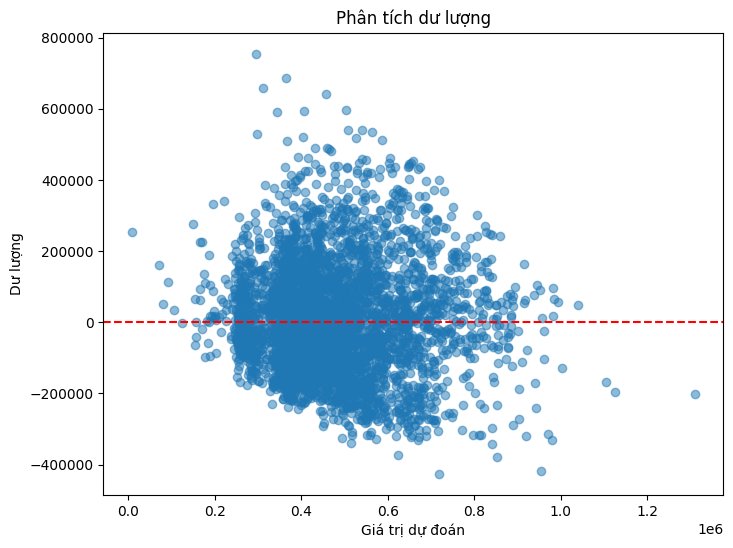

In [50]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ phân tán dư lượng
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Dư lượng')
plt.title('Phân tích dư lượng')
plt.show()


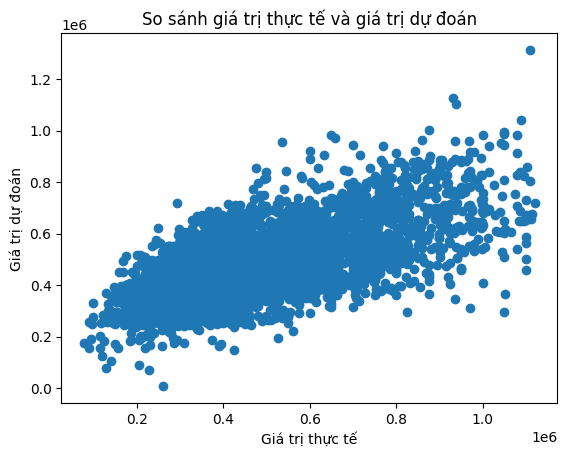

In [48]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.scatter(y_test, y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị thực tế và giá trị dự đoán')
plt.show()
